# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [119]:
from __future__ import print_function, division

%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
from mythinkstats import read_data, cohen_effect_size
from pprint import pprint
print('Ready')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Ready


Given a list of values, there are several ways to count the frequency of each value.

In [5]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [6]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [7]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [8]:
# import thinkstats2
# hist = thinkstats2.Hist([1, 2, 2, 3, 5])
# hist

`Hist` provides `Freq`, which looks up the frequency of a value.

In [10]:
# hist.Freq(2)

You can also use the bracket operator, which does the same thing.

In [11]:
# hist[2]

If the value does not appear, it has frequency 0.

In [12]:
# hist[4]

The `Values` method returns the values:

In [13]:
# hist.Values()

So you can iterate the values and their frequencies like this:

In [14]:
CohenEffectSize(grou)# for val in sorted(hist.Values()):
#     print(val, hist[val])

Or you can use the `Items` method:

In [15]:
# for val, freq in hist.Items():
#      print(val, freq)

`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

In [16]:
# import thinkplot
# thinkplot.Hist(hist)
# thinkplot.Config(xlabel='value', ylabel='frequency')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [25]:
preg = read_data(dct_file='ThinkStats2/code/2002FemPreg.dct',
                 dat_file='ThinkStats2/code/2002FemPreg.dat.gz')
live = preg[preg.outcome == 1]

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

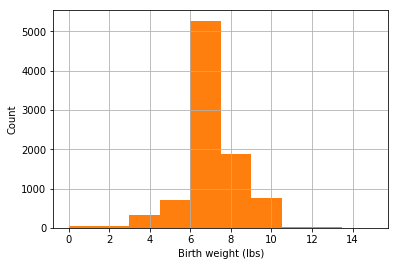

In [36]:
live.birthwgt_lb.hist()
plt.hist(live.birthwgt_lb[live.birthwgt_lb.isna() == False])
plt.xlabel('Birth weight (lbs)')
plt.ylabel('Count')
plt.show()

Before plotting the ages, I'll apply `floor` to round down:

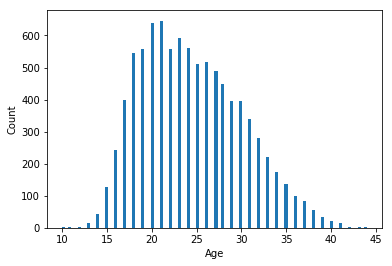

In [42]:
plt.hist(np.floor(live.agepreg), bins=100)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

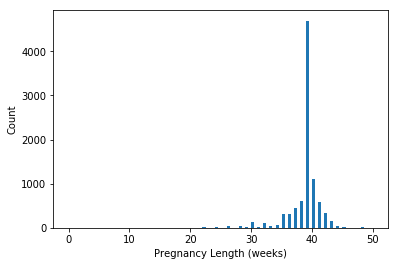

In [45]:
# Solution goes here
plt.hist(live.prglngth, bins=100)
plt.xlabel('Pregnancy Length (weeks)')
plt.ylabel('Count')
plt.show()

`Hist` provides smallest, which select the lowest values and their frequencies.

In [57]:
# for weeks, freq in hist.Smallest(10):
#     print(weeks, freq)

for weeks, freq in live.prglngth.value_counts(sort=True, ascending=True)[:10].iteritems():
    print(weeks, freq)

0 1
23 1
46 1
13 1
20 1
4 1
19 1
18 1
47 1
9 1


Use `Largest` to display the longest pregnancy lengths.

In [58]:
# Solution goes here
for weeks, freq in live.prglngth.value_counts()[:10].iteritems():
    print(weeks, freq)

39 4693
40 1116
38 607
41 587
37 455
42 328
36 321
35 311
43 148
30 138


From live births, we can selection first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [59]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

# first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
# other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use `width` and `align` to plot two histograms side-by-side.

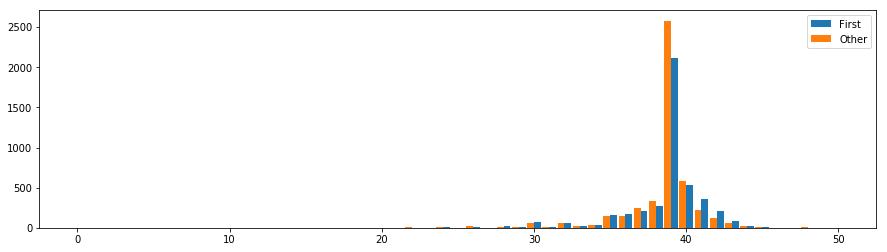

In [69]:
width = 0.45
plt.figure(figsize=(15,4))
hist = first.prglngth.value_counts()
plt.bar(hist.index, hist.values, label='First', width=width, align='edge')
hist = other.prglngth.value_counts()
plt.bar(hist.index, hist.values, label='Other', width=-width, align='edge')
plt.legend()
plt.show()

`Series` provides methods to compute summary statistics:

In [70]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

Here are the mean and standard deviation:

In [71]:
mean, std

(38.56055968517709, 2.702343810070587)

As an exercise, confirm that `std` is the square root of `var`:

In [72]:
# Solution goes here
std == np.sqrt(var)

True

Here's are the mean pregnancy lengths for first babies and others:

In [73]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [26]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [74]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    return diff / np.sqrt(pooled_var)

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [79]:
# Solution goes here
print(CohenEffectSize(first.prglngth, other.prglngth))
print(cohen_effect_size(first.prglngth, other.prglngth))

0.028879044654449834
0.028882209288160876


## Exercises

### Exercise 2.1

To get a story on the evening news: 

"A recent survey shows that non-first children, on average, arrive earlier than first children."

To reassure an anxious patient:

"The difference between pregnancy length for first and non-first children is only about 13 hours."

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [85]:
# Solution goes here
# CohenEffectSize(first.totalwgt_lb, other.totalwgt_lb)
cohen_effect_size(first.totalwgt_lb, other.totalwgt_lb)

# The mean weight for first births is lower, which makes the effect size negative.
# The absolute value of the effect is about four times as large as that for pregnancy length.
# Still, the two groups differ by < 0.2, which is generally considered a negligible effect.
# (http://staff.bath.ac.uk/pssiw/stats2/page2/page14/page14.html)

-0.08868274594712998

In [30]:
# Solution goes here

For the next few exercises, we'll load the respondent file:

In [86]:
# resp = nsfg.ReadFemResp()
resp = read_data('ThinkStats2/code/2002FemResp.dct', 'ThinkStats2/code/2002FemResp.dat.gz')
resp.head(1)

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

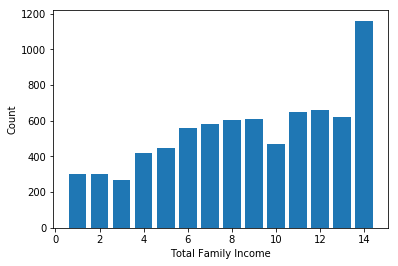

In [88]:
# Solution goes here
hist = resp.totincr.value_counts()
plt.bar(hist.index, hist.values)
plt.xlabel('Total Family Income')
plt.ylabel('Count')
plt.show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

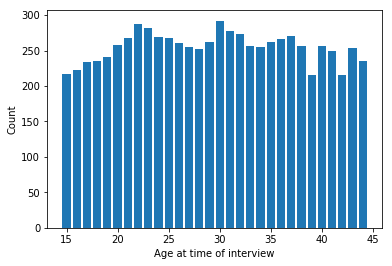

In [89]:
# Solution goes here
hist = resp.age_r.value_counts()
plt.bar(hist.index, hist.values)
plt.xlabel('Age at time of interview')
plt.ylabel('Count')
plt.show()

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

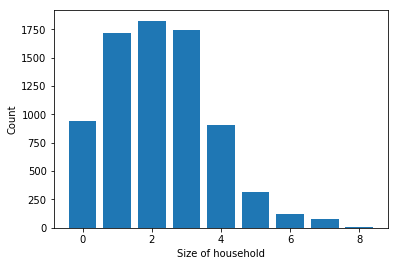

In [91]:
# Solution goes here.
hist = resp.numfmhh.value_counts()
plt.bar(hist.index, hist.values)
plt.xlabel('Size of household')
plt.ylabel('Count')
plt.show()

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

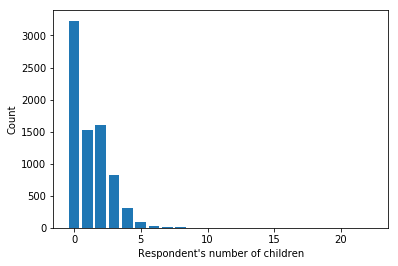

In [101]:
# Solution goes here
# Long-tail distribution: most of the respondent's have very few children,
# a small handful of them have a large number of children.
hist = resp.parity.value_counts()
plt.bar(hist.index, hist.values)
plt.xlabel('Respondent\'s number of children')
plt.ylabel('Count')
plt.show()

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [102]:
# Solution goes here
hist.index.max()

22

Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

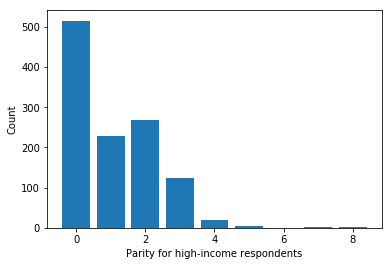

In [103]:
# Solution goes here
highinc = resp[resp.totincr == 14]
hist = highinc.parity.value_counts()
plt.bar(hist.index, hist.values)
plt.xlabel('Parity for high-income respondents')
plt.ylabel('Count')
plt.show()

Find the largest parities for high income respondents.

In [104]:
# Solution goes here
hist.index.max()

8

Compare the mean <tt>parity</tt> for high income respondents and others.

In [106]:
# Solution goes here
highinc = resp[resp.totincr == 14]
lessinc = resp[resp.totincr != 14]
print(highinc.parity.mean(), lessinc.parity.mean())

1.0758620689655172 1.2495758136665125


Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [109]:
# Solution goes here
# The two means are ~0.13 standard deviations apart, which is 5-6x larger than the
# effect size for pregnancies. This is a larger effect, but might still be considered
# negligible.
cohen_effect_size(highinc.parity, lessinc.parity)

-0.12513302844452415

### Exercise 2.3

- Compute the mode from a hist.
- Compute the value/frequency pairs in descending order from a hist.

In [120]:
hist = resp.parity.value_counts()
mode = hist.idxmax()
print('Mode = %d children, %d matching respondents' % (mode, hist[mode]))
pprint(list(hist.items()))

Mode = 0 children, 3230 matching respondents
[(0, 3230),
 (2, 1603),
 (1, 1519),
 (3, 828),
 (4, 309),
 (5, 95),
 (6, 29),
 (7, 15),
 (8, 8),
 (10, 3),
 (9, 2),
 (22, 1),
 (16, 1)]


### Exercise 2.4

- Are first babies lighter or heavier than others? 
- Use cohen effect size to quantify the difference.

First babies are, on average, heaver than others. The cohen difference is ~4x greater than that of pregnancy length.

In [123]:
first = preg[preg.birthord == 1]
other = preg[preg.birthord != 1]
cohen = cohen_effect_size(first.totalwgt_lb, other.totalwgt_lb)
print('Cohen effect first baby weight vs. other baby weight = %.3lf standard deviations' % cohen)

Cohen effect first baby weight vs. other baby weight = -0.089 standard deviations
